# 라이브러리 불러오기

In [551]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
# 1. 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 및 유니코드 지원

# 2. 마이너스(-) 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = True

# 타이타닉 데이터셋


In [552]:
df = pd.read_csv('dataset/train.csv')
holdout_df = pd.read_csv('dataset/test.csv')

In [553]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Pclass, sex, embarked, cabin은 범주형 변수로 볼 수 있다.
* 티켓가격, 나이, 가족 수(sibsp, parch) 등은 수치형 변수로 볼 수 있다
* sibsp + parch 로 가족 수를 수할 수 있을 것이다.
* 파생변수
  * age에서 소수점이 있으면 추정치이다. -> 추정 여부를 y/n으로 파생변수 만들 수 있을것이다.
  * 일행 여부를 가족 수를 기준으로 구할 수 있다.
* AGE, CABIN에 결측이 있다.
  * 결측 처리 전략을 변수 특성에 따라 고민해봐야 한다.

-> EDA 과정 및 전처리를 통해 데이터 처리를 한다. 

# EDA

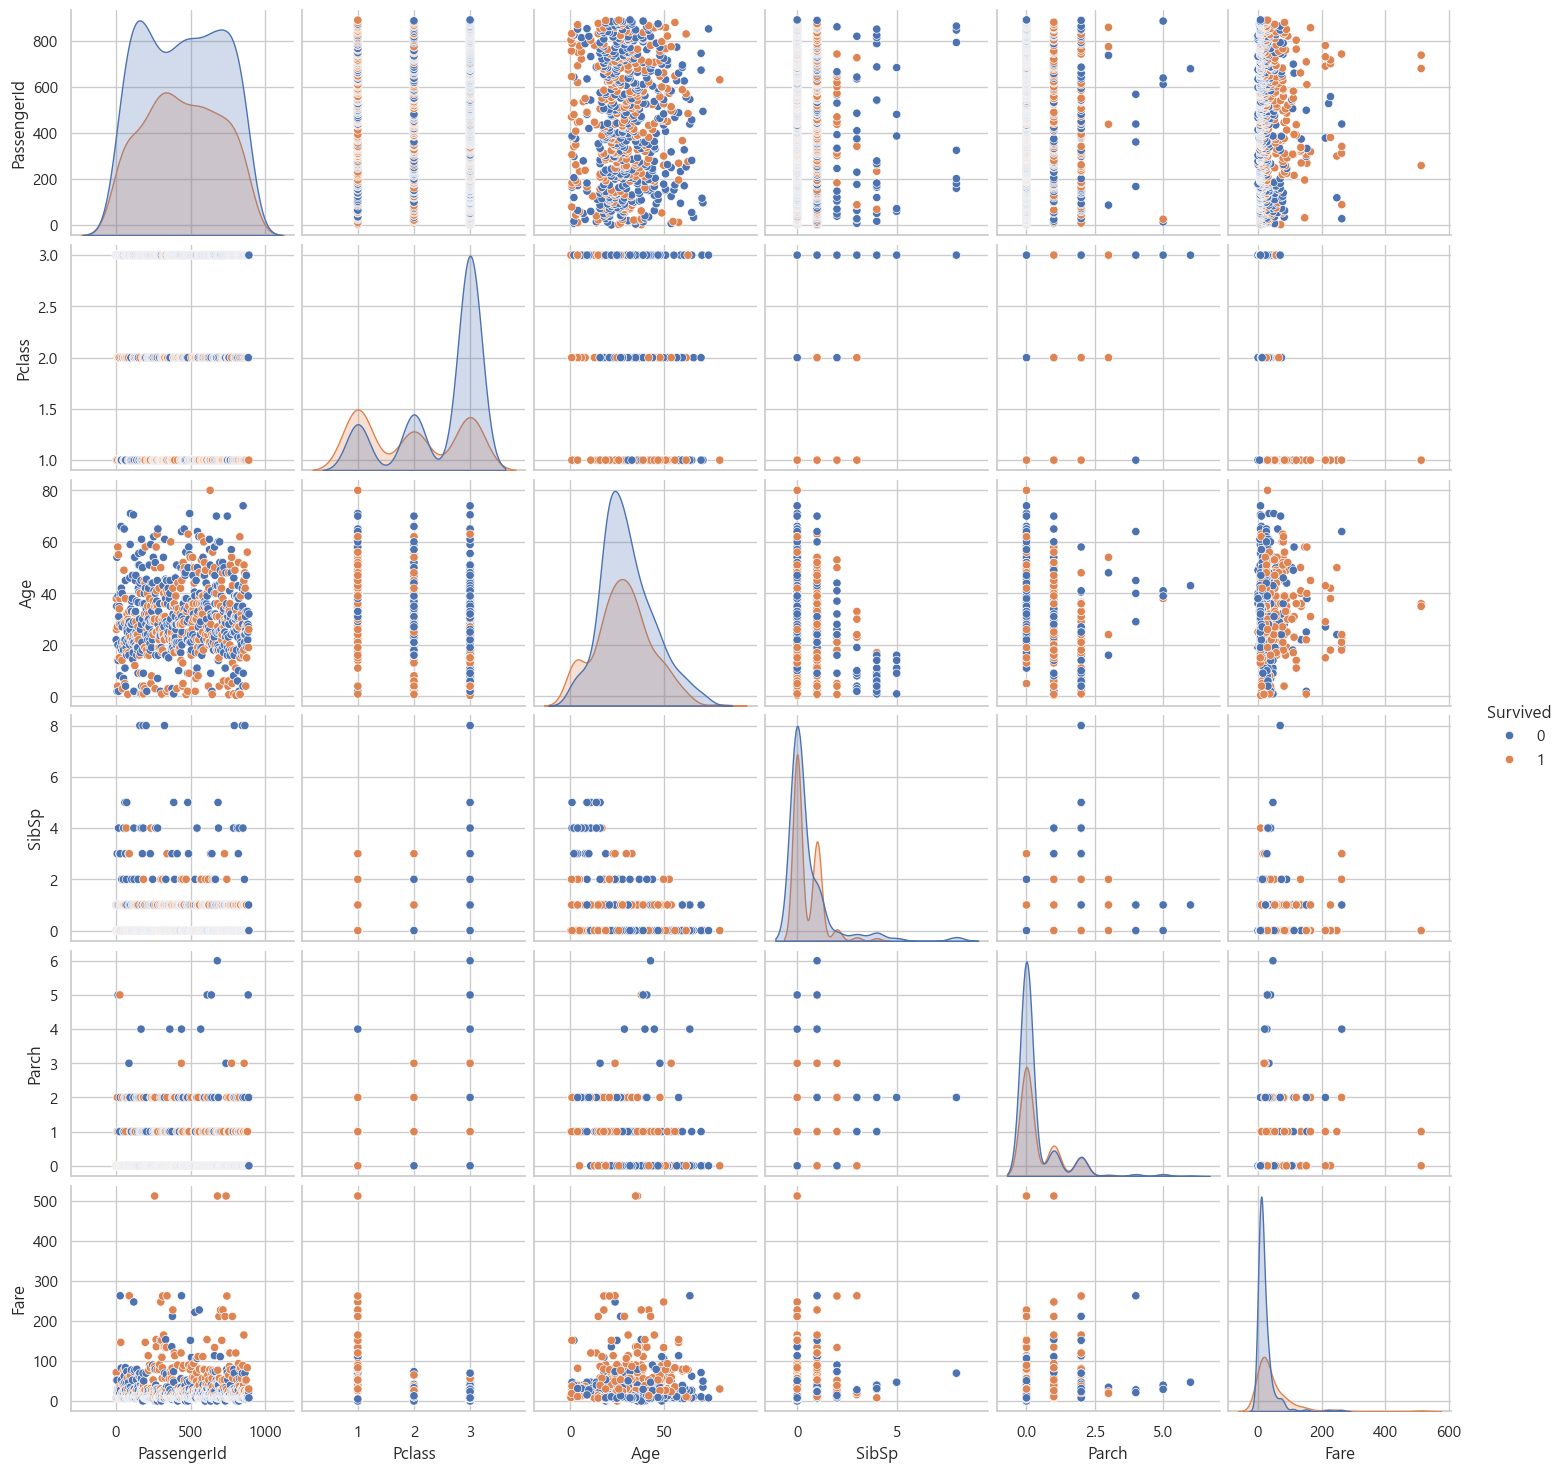

In [555]:
sns.pairplot(df, hue='Survived')

## 타겟 변수 분포

Survived
0    549
1    342
Name: count, dtype: int64

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


타겟 변수가 61:38로 불균형하다.
심한 불균형 상태는 아니므로, stratify 옵션을 사용하여 데이터를 나누는 정도로 처리하면 될 것이다.
참고) 이상탐지 등 90:10, 99:1 수준의 데이터라면 Oversampling, SMOOTH를 사용하는 것을 고려해야한다.


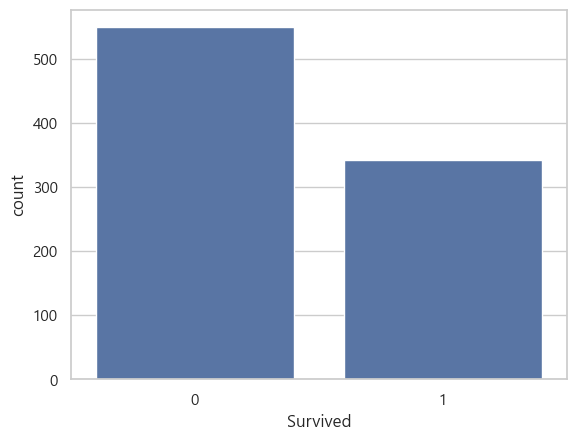

In [496]:
sns.barplot(df['Survived'].value_counts())
display(df['Survived'].value_counts())
display(df['Survived'].value_counts(normalize=True))
print('''
타겟 변수가 61:38로 불균형하다.
심한 불균형 상태는 아니므로, stratify 옵션을 사용하여 데이터를 나누는 정도로 처리하면 될 것이다.
참고) 이상탐지 등 90:10, 99:1 수준의 데이터라면 Oversampling, SMOOTH를 사용하는 것을 고려해야한다.''')


## 결측치 검토

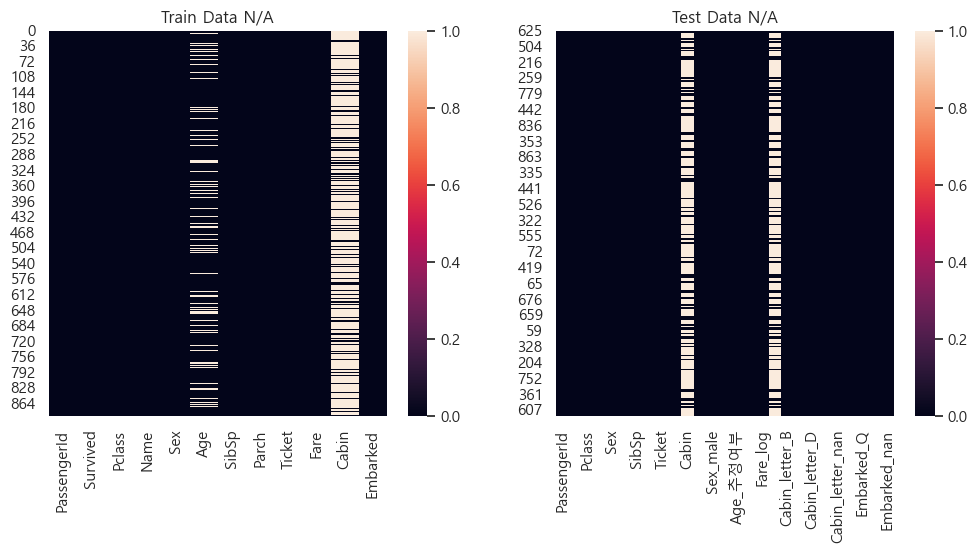


age, cabin에 결측이 존재한다.
test에는 fare에도 결측이 존재한다.



In [497]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes = axes.flatten()

sns.heatmap(df.isnull(), ax=axes[0])
sns.heatmap(test_df.isnull(), ax=axes[1])

axes[0].set_title('Train Data N/A')
axes[1].set_title('Test Data N/A')
plt.show()

print('''
age, cabin에 결측이 존재한다.
test에는 fare에도 결측이 존재한다.
''')

# 컬럼별 전처리
 * train, test가 나뉘어 제시된 상황이다.
 * 각각의 컬럼에 대해 각각 전처리를 수행해야 한다.
 * 데이터 누수 발생하지 않는 지 사전 검토해야 한다.
 * 과적합 방지를 위해 train 데이터를 train - valid 데이터셋으로 나누어 모델을 훈련하도록 한다.

In [498]:
from sklearn.model_selection import train_test_split
df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Survived'])

In [499]:
# PassengerId
## ID는 모델에 영향을 미치지 않는 변수이다.
## 별도의 전처리가 필요하지 않다.
## df를 전처리하고 X_train, X_test를 나눌 때 PassengerId는 포함하지 않는다.

In [500]:
# Survived는 타겟 변수이다.
## 이미 숫자 형태로 되어있으므로 별도의 전처리가 필요하지 않다.
## 사망:0, 생존:1이다.

In [501]:
# Pclass
## 1,2,3의 숫자 형태로 되어있어 범주형 변수로 볼 수 있다.
## 이미 숫자 형태로 되어있으므로 별도의 전처리가 필요하지 않다.

In [502]:
# Name
## mr, mrs, miss, dr 등의 호칭이 포함되어 있다.
## 호칭을 추출하여 새로운 컬럼으로 추가할 수는 있으나, 여기서는 생략한다.
## (키워드) regular expression( 정규식) 텍스트를 다룰 때 유용한 도구이다.
## import re 로 사용할 수 있다.

### 성별 - 이진변수의 처리

In [503]:
# Sex
## 범주형 변수이다.
## 맵핑 코드를 작성하여 0, 1로 변환한다.
## 원 핫 인코딩으로?
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)
sex_enc = ohe.fit_transform(df[['Sex']])
col_name = ohe.get_feature_names_out() # 더미변수 컬럼명을 자동으로 추출
df[col_name] = sex_enc
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S,1.0
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0.0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S,1.0
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,477,0,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S,1.0
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S,0.0
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S,0.0
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S,1.0


In [504]:
# test와 holdout에 대해서도 동일하게 처리
sex_enc = ohe.transform(test_df[['Sex']])
test_df[col_name] = sex_enc

sex_enc = ohe.transform(holdout_df[['Sex']])
holdout_df[col_name] = sex_enc

### Age

In [505]:
df['Age_missing'] = df['Age'].isnull()
test_df['Age_missing'] = test_df['Age'].isnull()
holdout_df['Age_missing'] = holdout_df['Age'].isnull()

<Axes: xlabel='Age_missing', ylabel='Survived'>

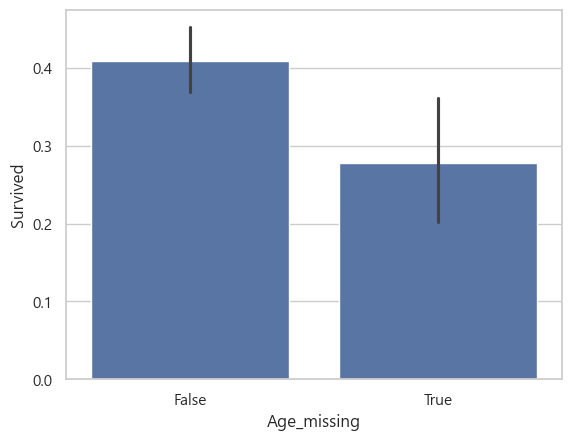

In [506]:
sns.barplot(x='Age_missing', y='Survived', data=df)
# True(사망) 인 경우 결측 비율이 더 많다.
# 결측 여부가 생존에 영향을 미칠 수 있다.

In [507]:
# Age의 추정 0.5 여부
df['Age_추정여부'] = (df['Age'].fillna(0) % 1) != 0
test_df['Age_추정여부'] = (test_df['Age'].fillna(0) % 1) != 0
holdout_df['Age_추정여부'] = (holdout_df['Age'].fillna(0) % 1) != 0

In [508]:
# 결측을 중앙값으로 채워준다.
df['Age'] = df['Age'].fillna(df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
holdout_df['Age'] = holdout_df['Age'].fillna(holdout_df['Age'].median())

<Axes: xlabel='Age_추정여부', ylabel='Survived'>

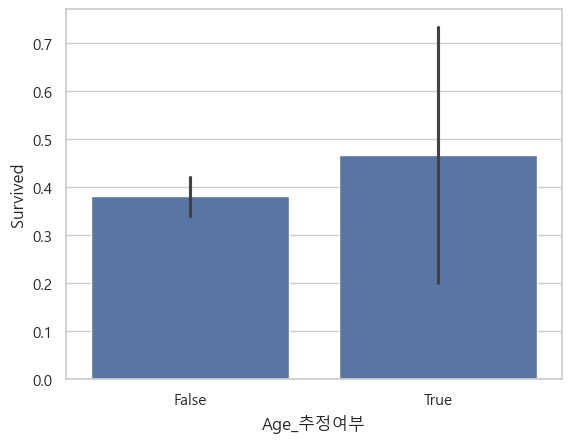

In [509]:
sns.barplot(x='Age_추정여부', y='Survived', data=df)
# 근소한 차이가 있는 것처럼 보이나. True의  ci가 범위가 넓음(신뢰도가 낮음)
# 통계분석을 해봐야 알겠지만, 유의하지 않을 가능성이 높다.
# 연령 추정여부 데이터를 모델에 넣을 지 여부는 모델 성능을 비교해보고 판단하자. 
# 결측 여부가 생존에 영향을 미칠 수 있다.

In [510]:
# 참고
from scipy.stats import ttest_ind

g_true = df.loc[df['Age_추정여부'] == True, 'Survived'].dropna()
g_false = df.loc[df['Age_추정여부'] == False, 'Survived'].dropna()
t, p = ttest_ind(g_true, g_false, equal_var=False)
print(f"t={t:.3f}, p={p:.4f}")
# 유의하지 않음

t=0.631, p=0.5376


### 가족 관련 data
- SibSp, Parch
- 더해서 가족 규모 데이터로 만들자. family_size = SibSp + Parch + 1
- 가족 유무 데이터를 파생변수로 만들 수 있다.

In [511]:
# 두번써도 되는데, 점점 귀찮아집니다.
def family(df):
    df['Family_size'] = df['SibSp'] + df['Parch'] + 1
    return df

df = family(df)
test_df = family(test_df)
holdout_df = family(holdout_df)

### ticket
 - 텍스트 데이터이나 어떤 규칙이 있긴 함.
 - 모델 성능을 극한으로 올리고 싶다면, 이름의 호칭 처리와 같이 특징 분석 후 데이터를 추출할 수는 있음

### Fare
 - 수치형 데이터, 경제력을 나타낸다.

In [512]:
# 수치 차이가 극명하게 나타나므로, 로그 변환을 한다.
# 소득, 주택가격 등 
# 로그변환
df['Fare_log'] = np.log1p(df['Fare'])
test_df['Fare_log'] = np.log1p(test_df['Fare'])
# Fare에 결측이 있는 경우가 있으므로, 결측을 0으로 채운 후 로그 변환
holdout_df['Fare'] = holdout_df['Fare'].fillna(0)
holdout_df['Fare_log'] = np.log1p(holdout_df['Fare'])

4.969725574240353
4.403856610876253


<Axes: xlabel='Fare_log', ylabel='Density'>

c:\Users\pooko\anaconda3\envs\bibiml\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\pooko\anaconda3\envs\bibiml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


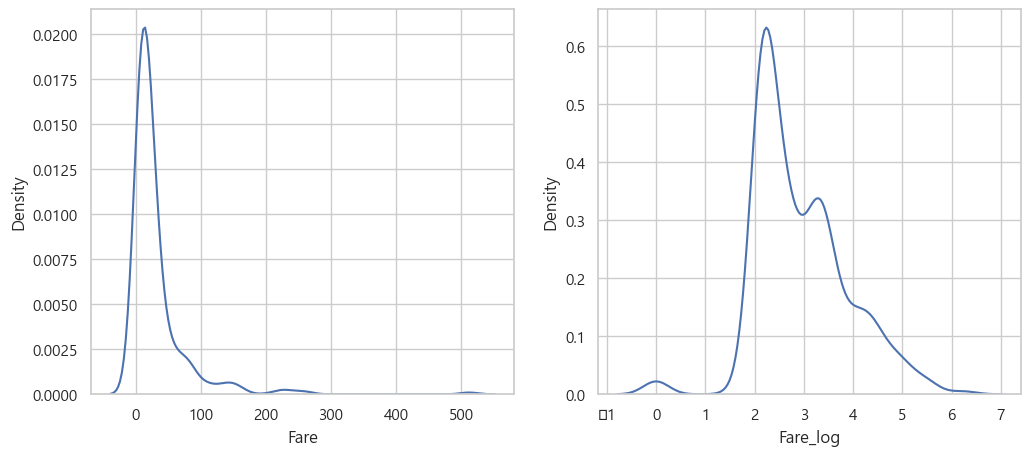

In [513]:
# 참고
from scipy.stats import skew
print(skew(df['Fare'].dropna()))
print(skew(test_df['Fare'].dropna()))
# 양의 왜도, 오른쪽 꼬리
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes = axes.flatten()
sns.kdeplot(df['Fare'], ax=axes[0])
sns.kdeplot(df['Fare_log'], ax=axes[1])

<Axes: xlabel='Pclass', ylabel='Fare_log'>

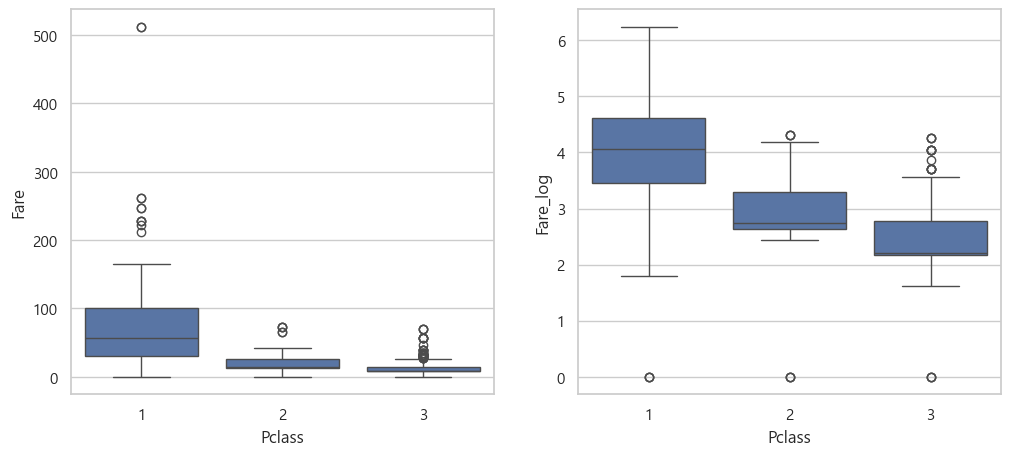

In [514]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes = axes.flatten()
sns.boxplot(x='Pclass', y='Fare',     data=df, ax=axes[0])
sns.boxplot(x='Pclass', y='Fare_log', data=df, ax=axes[1])

### Cabin
결측이 너무 많다.
1. 버린다. - 별도 조치 하지 않음
2. 영어는 객실 위치를 나타내는 주요 정보. 살린다.

In [515]:
df['Cabin'].value_counts()

Cabin
F33      3
G6       3
D33      2
D        2
D17      2
        ..
F G73    1
C104     1
C32      1
A7       1
D47      1
Name: count, Length: 113, dtype: int64

In [516]:
# carbin 데이터 추출
df['Cabin'].str[:1].value_counts().sort_index()

Cabin
A    13
B    29
C    35
D    23
E    24
F     8
G     3
T     1
Name: count, dtype: int64

In [517]:
# Cabin 첫글자
df['Cabin_letter'] = df['Cabin'].str[:1]
test_df['Cabin_letter'] = test_df['Cabin'].str[:1]
holdout_df['Cabin_letter'] = holdout_df['Cabin'].str[:1]

In [518]:
# Cabin_letter 원핫인코딩
# 30개 이상인것만 원핫
ohe_cabin = OneHotEncoder(sparse_output=False,
                          min_frequency=20,   # 20개 이상만
                          handle_unknown='infrequent_if_exist')  # df에 없는 cat인경우는 별도로
cabin_enc = ohe_cabin.fit_transform(df[['Cabin_letter']])
col_name = ohe_cabin.get_feature_names_out()
df[col_name] = cabin_enc
test_df[col_name] = ohe_cabin.transform(test_df[['Cabin_letter']])
holdout_df[col_name] = ohe_cabin.transform(holdout_df[['Cabin_letter']])

In [519]:
# # 결측여부 - ohe에서 자동으로 처리되었으므로 하지 않는다.
# df['Cabin_missing'] = df['Cabin'].isnull()
# test_df['Cabin_missing'] = test_df['Cabin'].isnull()

### Embarked

In [520]:
ohe_embarked = OneHotEncoder(drop='first', sparse_output=False)
embarked_enc = ohe_embarked.fit_transform(df[['Embarked']])
col_name = ohe_embarked.get_feature_names_out()
df[col_name] = embarked_enc
test_df[col_name] = ohe_embarked.transform(test_df[['Embarked']])
holdout_df[col_name] = ohe_embarked.transform(holdout_df[['Embarked']])

# 전처리 끝!!!

In [521]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_letter,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_nan,Cabin_letter_infrequent_sklearn,Embarked_Q,Embarked_S,Embarked_nan
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,...,D,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45,46,0,3,"Rogers, Mr. William John",male,29.0,0,0,S.C./A.4. 23567,8.0500,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.0,0,0,330959,7.8792,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.0,0,0,112052,0.0000,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,477,0,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,...,E,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [522]:
test_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_letter,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_nan,Cabin_letter_infrequent_sklearn,Embarked_Q,Embarked_S,Embarked_nan
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,...,D,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
459,460,0,3,"O'Connor, Mr. Maurice",male,27.0,0,0,371060,7.7500,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [523]:
holdout_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin_letter,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_nan,Cabin_letter_infrequent_sklearn,Embarked_Q,Embarked_S,Embarked_nan
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# 모델링

In [524]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_male',
       'Age_missing', 'Age_추정여부', 'Family_size', 'Fare_log', 'Cabin_letter',
       'Cabin_letter_B', 'Cabin_letter_C', 'Cabin_letter_D', 'Cabin_letter_E',
       'Cabin_letter_nan', 'Cabin_letter_infrequent_sklearn', 'Embarked_Q',
       'Embarked_S', 'Embarked_nan'],
      dtype='object')

In [538]:
# X, y 설정
feature_cols = ['Pclass',
                'Sex_male',
                'Age', 'Age_missing', 'Age_추정여부',
                'Family_size',
                'Fare_log',
                'Cabin_letter_B', 'Cabin_letter_C', 'Cabin_letter_D', 'Cabin_letter_E', 'Cabin_letter_nan', 'Cabin_letter_infrequent_sklearn',
                'Embarked_Q', 'Embarked_S', 'Embarked_nan'
                ]

In [526]:
# X, y 설정
feature_cols = ['Pclass',
                'Sex_male',
                'Age']

In [527]:
# X, y 설정
feature_cols = [
                'Sex_male']

In [539]:

X_train = df[feature_cols]
y_train = df['Survived']
X_test = test_df[feature_cols]
y_test = test_df['Survived']
X_holdout = holdout_df[feature_cols]
# y_holdout = holdout_df['Survived'] # 홀드아웃에는 정답이 없다.

In [540]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_holdout_scaled = scaler.transform(X_holdout)

# 모델 훈련

In [564]:
# 모델 결과 축적
results = []
# 함수로 만들자

def score_record(model, model_name):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    results.append({'model':model_name,
                   'train_accuracy': train_accuracy,
                   'test_accuracy': test_accuracy})
    return results

## logisticRegression

In [565]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
results = score_record(logreg_model, 'Logistic Regression')

## knn

In [566]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
results = score_record(knn_model, 'knn_model')

## decision Tree

In [567]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
results = score_record(dt_model, 'decision Tree')

## RandomForest

In [568]:
# 모델 만들기
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train, y_train)
results = score_record(rfc_model, 'RandomForestClassifier')

## XGBoost

In [569]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
results = score_record(xgb_model, 'XGBClassifier')


## svm


In [570]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
results = score_record(svm_model, 'SVC')

# 평가

In [571]:
model_result = pd.DataFrame(results)
model_result

,model,train_accuracy,test_accuracy
0,Logistic Regression,0.815409,0.802239
1,knn_model,0.828250,0.667910
2,decision Tree,0.983949,0.738806
3,RandomForestClassifier,0.983949,0.776119
4,XGBClassifier,0.616372,0.615672
5,SVC,0.656501,0.634328


<Axes: xlabel='model', ylabel='accuracy'>

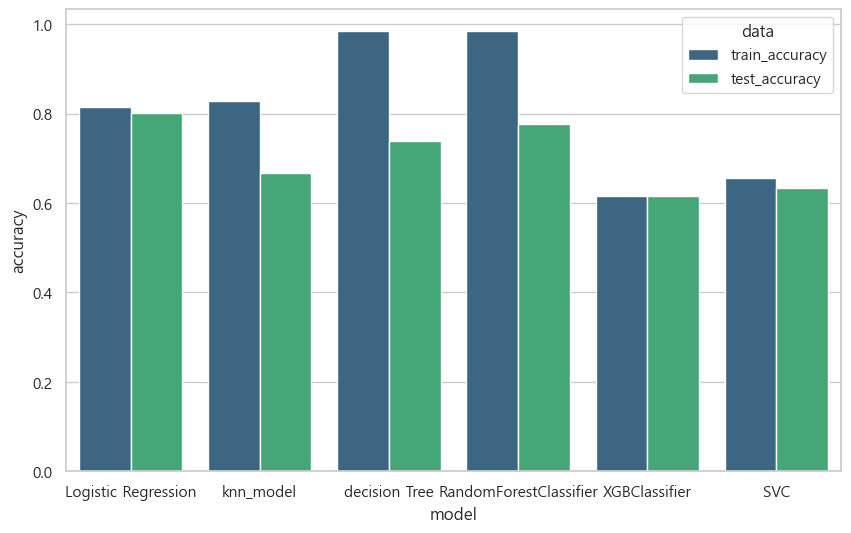

In [572]:
# 긴 형태로 변환 (컴퓨터가 보기 쉬운 데이터 형태)
df_melted = model_result.melt(id_vars='model', value_vars=['train_accuracy', 'test_accuracy'],
                    var_name='data', value_name='accuracy')

# 스타일 설정
plt.figure(figsize=(10, 6))

# 막대그래프
sns.barplot(data=df_melted, x='model', y='accuracy', hue='data', palette='viridis')


* 챔피언 모델은
  * Logistic Regression
  * 일반화 성능과 예측성능이 모두 높음

# 캐글에 업로드

In [436]:
pred = rfc_model.predict(X_holdout)

In [437]:
output = pd.DataFrame()
output = holdout_df[['PassengerId']]
output['Survived'] = pred
output.to_csv('submission.csv',index=False)

C:\Users\pooko\AppData\Local\Temp\ipykernel_5392\2496331967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Survived'] = pred


# 기타

C:\Users\pooko\AppData\Local\Temp\ipykernel_5392\2729605803.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='features', y='accuracy', palette='viridis')


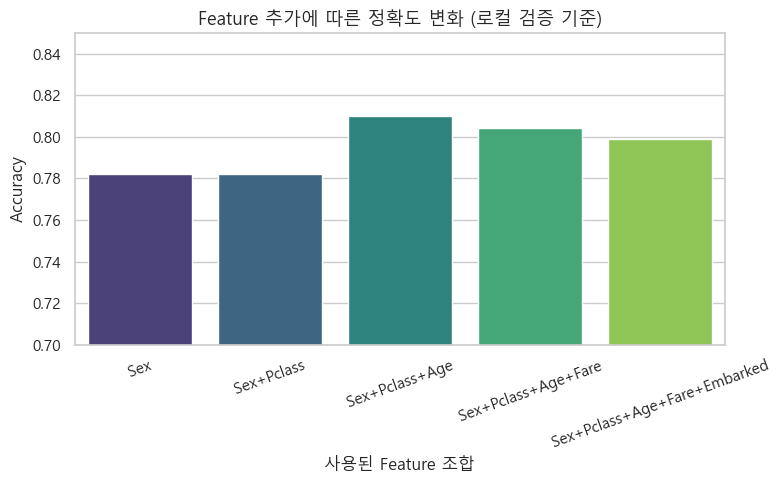

,features,accuracy
0,Sex,0.782123
1,Sex+Pclass,0.782123
2,Sex+Pclass+Age,0.810056
3,Sex+Pclass+Age+Fare,0.804469
4,Sex+Pclass+Age+Fare+Embarked,0.798883


In [439]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
train = pd.read_csv("./dataset/train.csv")

# 결측 처리
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Fare'].fillna(train['Fare'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# 성별 인코딩
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])  # female=0, male=1

# 모델별 feature 조합
feature_sets = [
    ['Sex'],
    ['Sex', 'Pclass'],
    ['Sex', 'Pclass', 'Age'],
    ['Sex', 'Pclass', 'Age', 'Fare'],
    ['Sex', 'Pclass', 'Age', 'Fare', 'Embarked']
]

# 결과 저장
results = []

for features in feature_sets:
    X = train[features]
    y = train['Survived']
    X = pd.get_dummies(X, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append({'features': '+'.join(features), 'accuracy': acc})

# 결과 시각화
results_df = pd.DataFrame(results)

sns.set(style='whitegrid', font='Malgun Gothic')
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x='features', y='accuracy', palette='viridis')
plt.title('Feature 추가에 따른 정확도 변화 (로컬 검증 기준)', fontsize=13)
plt.ylabel('Accuracy')
plt.xlabel('사용된 Feature 조합')
plt.xticks(rotation=20)
plt.ylim(0.7, 0.85)
plt.tight_layout()
plt.show()

results_df


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# -----------------------------------------
# 1️⃣ 데이터 로드
# -----------------------------------------
train = pd.read_csv("./dataset/train.csv")
test = pd.read_csv("./dataset/test.csv")

# -----------------------------------------
# 2️⃣ 기본 결측치 처리
# -----------------------------------------
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Fare'].fillna(train['Fare'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

# -----------------------------------------
# 3️⃣ 문자열 기반 Feature Engineering
# -----------------------------------------

# (1) Name → Title 추출
for df in [train, test]:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace({
        'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
        'Dr': 'Officer', 'Rev': 'Officer', 'Major': 'Officer',
        'Col': 'Officer', 'Capt': 'Officer', 'Sir': 'Royalty',
        'Lady': 'Royalty', 'Countess': 'Royalty', 'Jonkheer': 'Royalty', 'Don': 'Royalty'
    })
    df['Title'] = df['Title'].where(df['Title'].isin(['Mr','Mrs','Miss','Master','Officer','Royalty']), 'Other')

# (2) Ticket → Prefix / Group Size
for df in [train, test]:
    df['Ticket_prefix'] = df['Ticket'].str.extract('([A-Za-z]+)', expand=False).fillna('NONE')
    ticket_counts = df['Ticket'].value_counts()
    df['Ticket_group_size'] = df['Ticket'].map(ticket_counts)
    df['Is_Group'] = (df['Ticket_group_size'] > 1).astype(int)

# (3) Cabin → Deck 추출
for df in [train, test]:
    df['Deck'] = df['Cabin'].astype(str).str[0]
    df['Deck'] = df['Deck'].replace('n', 'Unknown')

# -----------------------------------------
# 4️⃣ Family size, Alone 여부
# -----------------------------------------
for df in [train, test]:
    df['Family_size'] = df['SibSp'] + df['Parch'] + 1
    df['Is_Alone'] = (df['Family_size'] == 1).astype(int)

# -----------------------------------------
# 5️⃣ 수치형 및 범주형 인코딩
# -----------------------------------------
feature_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
    'Title', 'Deck', 'Ticket_prefix',
    'Family_size', 'Is_Alone', 'Is_Group'
]

df_all = pd.concat([train[feature_cols], test[feature_cols]], axis=0)
df_all = pd.get_dummies(df_all, columns=['Sex','Embarked','Title','Deck','Ticket_prefix'], drop_first=True)

train_X = df_all.iloc[:len(train)]
test_X = df_all.iloc[len(train):]
train_y = train['Survived']

# -----------------------------------------
# 6️⃣ 표준화 및 학습
# -----------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_X)
test_scaled = scaler.transform(test_X)

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, train_y, test_size=0.2, random_state=42, stratify=train_y)

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=7,
    min_samples_split=4,
    random_state=42
)
model.fit(X_train, y_train)

# -----------------------------------------
# 7️⃣ 검증 및 제출
# -----------------------------------------
pred_valid = model.predict(X_valid)
acc = accuracy_score(y_valid, pred_valid)
print(f"Validation Accuracy: {acc:.4f}")

test_pred = model.predict(test_scaled)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_pred
})
submission.to_csv('submission_advanced.csv', index=False)
print("✅ submission_advanced.csv 생성 완료")


Validation Accuracy: 0.8212
✅ submission_advanced.csv 생성 완료
